In [140]:
import pandas as pd
from ggplot import *
import numpy as np
import os
import matplotlib.pyplot as plt
import pylab
import statsmodels as sm
import seaborn as sn


In [2]:
os.getcwd()

'C:\\Users\\shrid'

In [3]:
os.chdir("C:\\Users\shrid\Downloads\edWisor")

In [4]:
os.getcwd()

'C:\\Users\\shrid\\Downloads\\edWisor'

In [5]:
day = pd.read_csv("day.csv")

In [6]:
#Let's check the structure of data
day.shape
day.dtypes

instant         int64
dteday         object
season          int64
yr              int64
mnth            int64
holiday         int64
weekday         int64
workingday      int64
weathersit      int64
temp          float64
atemp         float64
hum           float64
windspeed     float64
casual          int64
registered      int64
cnt             int64
dtype: object

In [7]:
#Let's check for Missing values
day.isnull().sum()

#We don't see any null values, So we are good to go

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

In [8]:
                                        #FEATURE ENGINEERING
    #season: Season (1:springer, 2:summer, 3:fall, 4:winter)
day["season"] = day["season"].replace([1,2,3,4],["Spring", "Summer", "Fall", "Winter"])

day["yr"] = day["yr"].replace([0,1],["2011", "2012"])

In [9]:
# yr: Year (0: 2011, 1:2012)
day["mnth"] = day["mnth"].replace([1,2,3,4,5,6,7,8,9,10,11,12], ["Jan", "Feb", "mar", "Apr", "May", "Jun", "Jul", "Aug", "Sep", "Oct", "Nov", "Dec"])

In [10]:
#holiday: weather day is holiday or not (extracted fromHoliday Schedule)
day["holiday"] = day["holiday"].replace([0,1],["Working Day", "Holiday"])

In [11]:
#weekday: Day of the week
day["weekday"] = day["weekday"].replace([0,1,2,3,4,5,6],["Sunday","Monday","Tuesday","Wednesday","Thursday","Friday","Saturday"])

In [12]:
#workingday: If day is neither weekend nor holiday is 1, otherwise is 0.
day["workingday"] = day["workingday"].replace([0,1],["Weekoff","Weekday"])

In [13]:
#weathersit: (extracted fromFreemeteo)
#1: Clear, Few clouds, Partly cloudy, Partly cloudy
#2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist
#3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds
#4: Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog
day["weathersit"] = day["weathersit"].replace([1,2,3,4],["Clear","Misty+Clouds","Light Snow","Heavy Rain"])

In [14]:
#temp: Normalized temperature in Celsius. The values are derived via
# temp = (t-t_min)/(t_max-t_min), t_min=-8, t_max=+39 (only in hourly scale) 
#t = temp*(39+8) -8 which is approximately t = temp *39
day["temp"] = day["temp"]*39

In [15]:
#atemp: Normalized feeling temperature in Celsius. The values are derived via
#(t-t_min)/(t_maxt_min), t_min=-16, t_max=+50 (only in hourly scale)

day["atemp"] = day["atemp"]*50

In [16]:
#hum: Normalized humidity. The values are divided to 100 (max)
day["hum"] = day["hum"]*100

In [17]:
#windspeed: Normalized wind speed. The values are divided to 67 (max)
day["windspeed"] = day["windspeed"]*67

In [18]:
day.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,Spring,2011,Jan,Working Day,Saturday,Weekoff,Misty+Clouds,13.422513,18.18125,80.5833,10.749882,331,654,985
1,2,2011-01-02,Spring,2011,Jan,Working Day,Sunday,Weekoff,Misty+Clouds,14.175642,17.68695,69.6087,16.652113,131,670,801
2,3,2011-01-03,Spring,2011,Jan,Working Day,Monday,Weekday,Clear,7.658196,9.47025,43.7273,16.636703,120,1229,1349
3,4,2011-01-04,Spring,2011,Jan,Working Day,Tuesday,Weekday,Clear,7.800000,10.60610,59.0435,10.739832,108,1454,1562
4,5,2011-01-05,Spring,2011,Jan,Working Day,Wednesday,Weekday,Clear,8.851323,11.46350,43.6957,12.522300,82,1518,1600


In [19]:
a = ggplot(day, aes("season")) + geom_bar(fill = "cyan") + labs(x = "Season", y = "Number of bike rental")

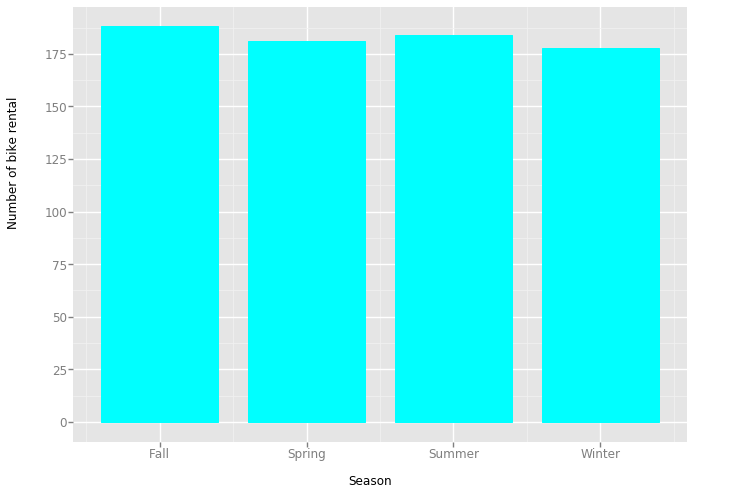

<ggplot: (-9223371888207271520)>

In [20]:
a

In [21]:
b = ggplot(day, aes("mnth")) + geom_bar(fill = "darkcyan") + labs(x = "Month", y = ("Number of bike rentals"))

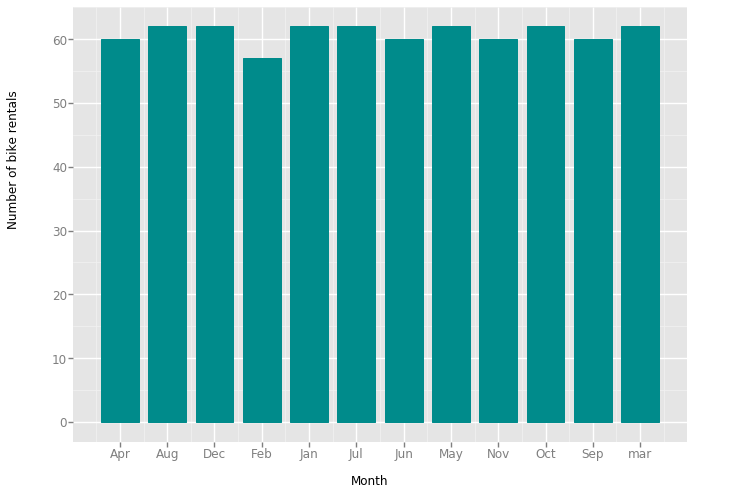

<ggplot: (-9223371888206905332)>

In [22]:
b

In [23]:
c = ggplot(day, aes("workingday")) + geom_bar(fill = "aquamarine") + labs(x = "Working day", y="Number of Bike rentals")

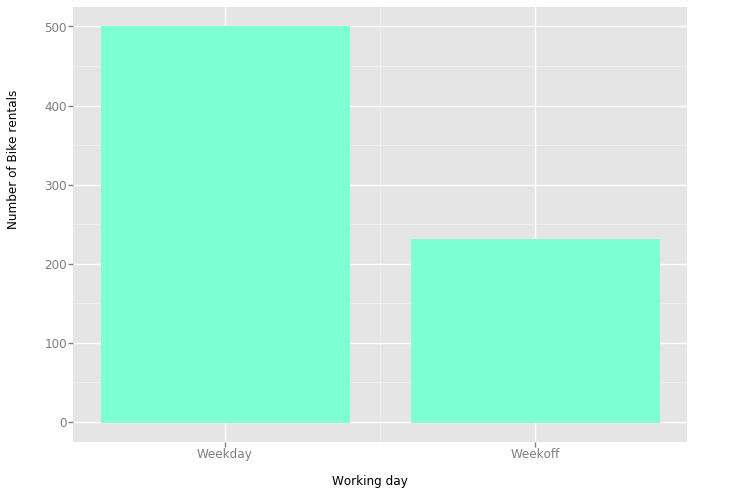

<ggplot: (-9223371888207032760)>

In [24]:
c

In [25]:
d = ggplot(day, aes("weekday")) + geom_bar(fill = "cornflowerblue") + labs(x = "Weekday", y = "Number of Bike rentals")

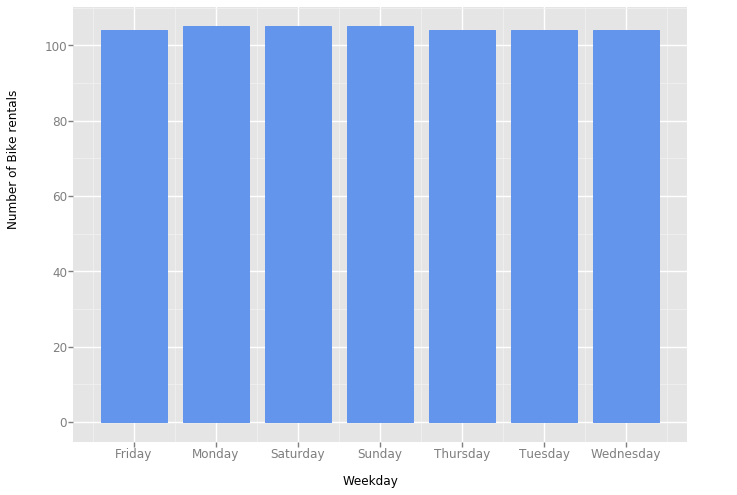

<ggplot: (-9223371888207014828)>

In [26]:
d

In [27]:
e = ggplot(day, aes("yr")) + geom_bar(fill = "powderblue")  + labs(x = "Year", y = "Number of Bike rentals") 

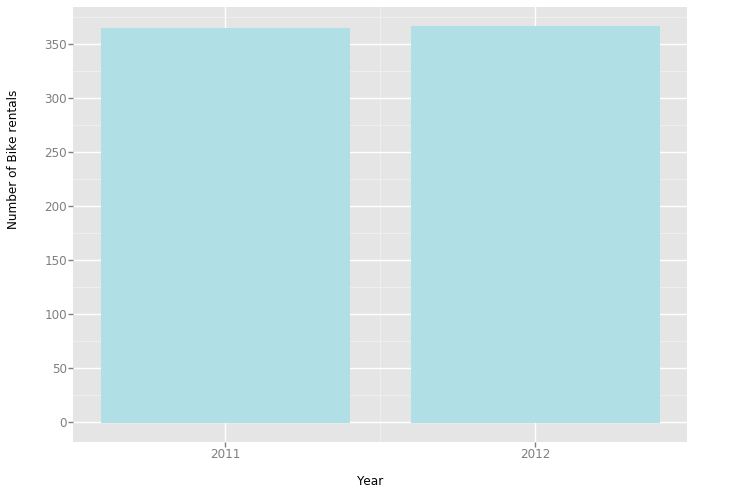

<ggplot: (-9223371888206931884)>

In [28]:
e

In [29]:
f = ggplot(day, aes("holiday")) + geom_bar(fill = "midnightblue") + labs(x="Holiday or Weekend", y = "Number of Bike rentals")

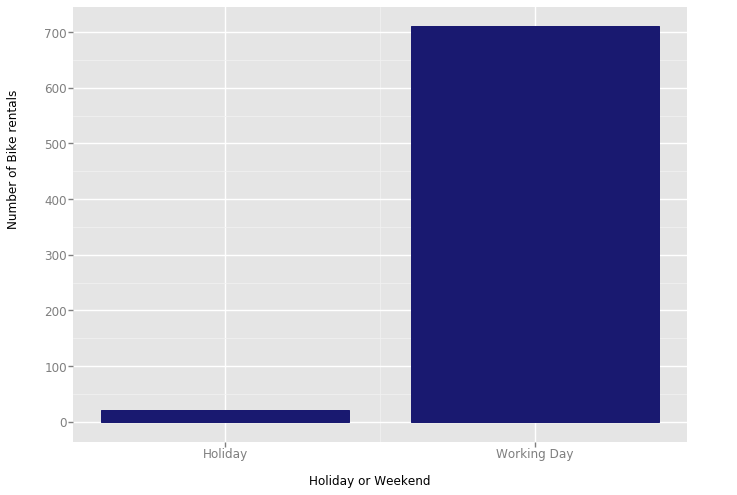

<ggplot: (-9223371888205700380)>

In [30]:
f

In [52]:
chart1 = ggplot(day, aes(x = "temp", y = "cnt", color = "mnth")) + geom_point() + labs( x = "Temperature", y = "No. of Bike Rentals")

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches

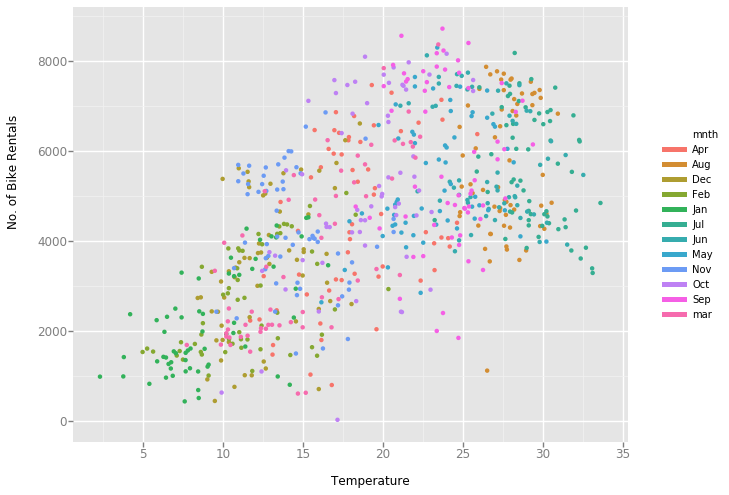

<ggplot: (-9223371888202972824)>

In [49]:
chart1

In [55]:
chart2 = ggplot(day, aes(x = "hum", y = "cnt", color = "mnth")) + geom_point() + labs( x = "Humidity", y = "No. of Bike Rentals")

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches

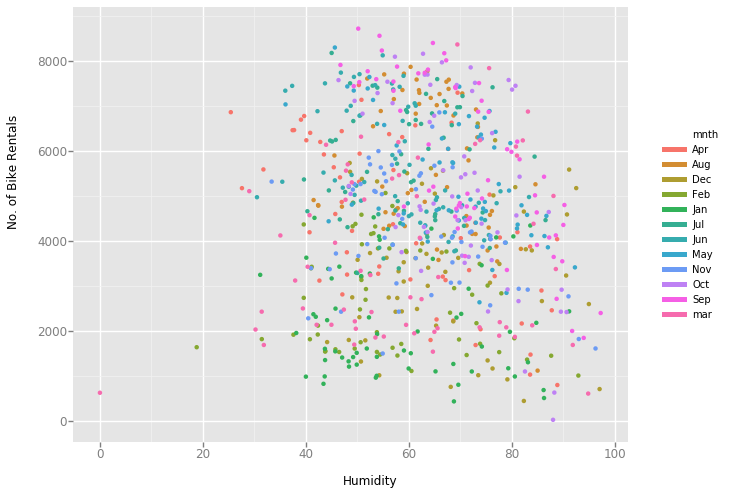

<ggplot: (-9223371888205200952)>

In [56]:
chart2

In [57]:
chart3 = ggplot(day, aes(x = "weathersit", y="cnt", color = "mnth")) + geom_point() + labs(x = "WeatherSit", y = "No. of Bike Rentals")

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches

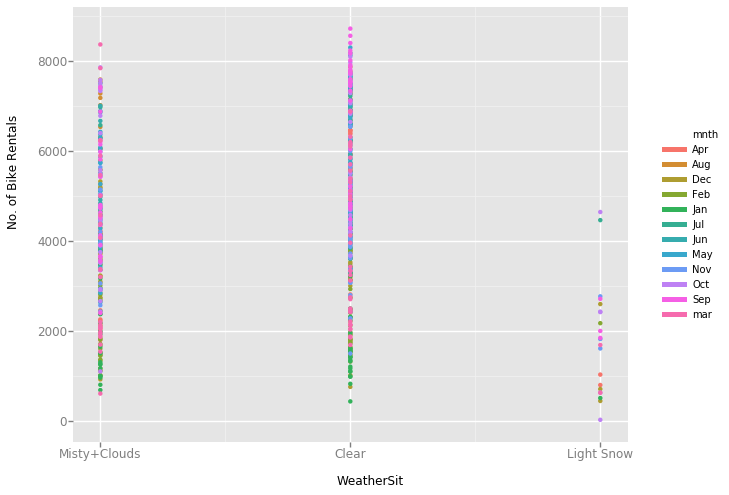

<ggplot: (-9223371888205132624)>

In [58]:
chart3

In [59]:
chart4 = ggplot(day, aes(x = "windspeed", y = "cnt", color = "mnth")) + geom_point() + labs(x = "Windspeed", y= "No. of Bike Rentals")

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches

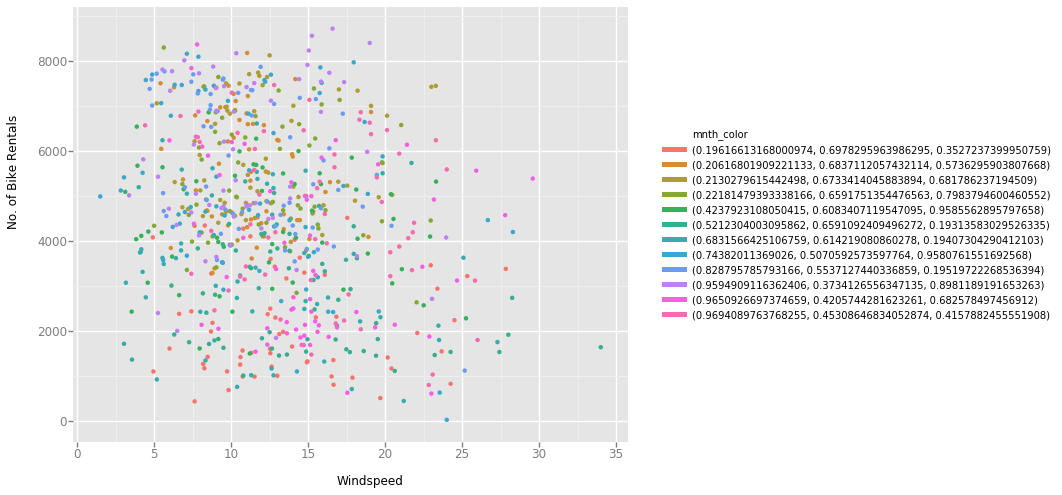

<ggplot: (-9223371888205556496)>

In [61]:
chart4

In [66]:
day.cov()

,instant,temp,atemp,hum,windspeed,casual,registered,cnt
instant,44591.000000,227.001367,262.628051,49.248842,-123.481526,39909.582192,2.173278e+05,2.572374e+05
temp,227.001367,50.965162,57.686190,12.909588,-5.854701,2663.067478,6.015006e+03,8.678073e+03
atemp,262.628051,57.686190,66.390864,16.245904,-7.769499,3042.721823,6.918343e+03,9.961065e+03
hum,49.248842,12.909588,16.245904,202.860471,-18.376831,-753.098741,-2.024225e+03,-2.777323e+03
windspeed,-123.481526,-5.854701,-7.769499,-18.376831,26.960575,-597.573322,-1.761643e+03,-2.359216e+03
casual,39909.582192,2663.067478,3042.721823,-753.098741,-597.573322,471450.441418,4.234689e+05,8.949193e+05
registered,217327.795890,6015.005840,6918.342950,-2024.224735,-1761.643058,423468.902417,2.434400e+06,2.857869e+06
cnt,257237.378082,8678.073318,9961.064773,-2777.323477,-2359.216380,894919.343836,2.857869e+06,3.752788e+06


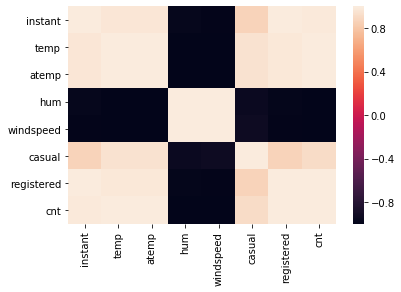

In [97]:
sn.heatmap(day.cov().corr())
plt.show()

In [108]:
day1 = pd.read_csv("day.csv")
data1 = day1.drop(columns = ["instant","dteday","holiday","registered","casual","atemp"])

In [120]:
#linear Regression

from sklearn.model_selection import train_test_split


import statsmodels.api as sm
from sklearn.metrics import mean_squared_error

In [109]:
train,test = train_test_split(data1, test_size = 0.3, random_state = 300)

In [110]:
test

,season,yr,mnth,weekday,workingday,weathersit,temp,hum,windspeed,cnt
226,3,0,8,1,1,1,0.665833,0.712083,0.208954,4338
181,3,0,7,5,1,1,0.722500,0.396250,0.102608,5362
509,2,1,5,4,1,1,0.655000,0.716667,0.172896,6770
606,3,1,8,3,1,1,0.685000,0.552083,0.112562,7697
304,4,0,11,2,1,1,0.400833,0.683750,0.135571,4068
63,1,0,3,6,0,2,0.384167,0.789167,0.251871,2077
34,1,0,2,5,1,2,0.211304,0.585217,0.127839,1708
351,4,0,12,0,0,1,0.238333,0.586250,0.169779,2431
659,4,1,10,0,0,1,0.464167,0.510000,0.166054,6824
624,3,1,9,0,0,1,0.580000,0.570000,0.090183,7333


In [111]:
#Let's Train the model
model1 = sm.OLS(train.iloc[:,9].astype(float), train.iloc[:,0:9].astype(float)).fit()

In [113]:
model1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                    cnt   R-squared (uncentered):                   0.966
Model:                            OLS   Adj. R-squared (uncentered):              0.966
Method:                 Least Squares   F-statistic:                              1607.
Date:                Mon, 12 Aug 2019   Prob (F-statistic):                        0.00
Time:                        11:02:58   Log-Likelihood:                         -4196.2
No. Observations:                 511   AIC:                                      8410.
Df Residuals:                     502   BIC:                                      8449.
Df Model:                           9                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
season       580.9403     65.164      8.915      0.000     452.912     708.968
yr          2169.6085     78.383     27.680      0.000    2015.610    2323.607
mnth         -51.9077     20.255     -2.563      0.011     -91.703     -12.112
weekday      103.7915     19.250      5.392      0.000      65.972     141.611
workingday   249.4402     83.948      2.971      0.003      84.508     414.372
weathersit  -675.0789     94.489     -7.145      0.000    -860.722    -489.436
temp        5362.0116    231.761     23.136      0.000    4906.671    5817.352
hum          460.5505    311.275      1.480      0.140    -151.011    1072.112
windspeed  -1145.5390    446.170     -2.567      0.011   -2022.130    -268.949
==============================================================================
Omnibus:                       53.731   Durbin-Watson:                   1.998
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               98.616
Skew:                          -0.644   Prob(JB):                     3.85e-22
Kurtosis:                       4.724   Cond. No.                         96.9
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [115]:
#Let's predict the Summary of Test data
prediction1 = model1.predict(test.iloc[:,0:9])

In [117]:
data_model1 = pd.DataFrame({'actual': test.iloc[:,9], 'pred': prediction1})
data_model1.head()

,actual,pred
226,4338,4664.502080
181,5362,5411.791388
509,6770,6705.598181
606,7697,7181.200067
304,4068,3843.592190


In [137]:
#Let's calculate MAPE
def MAPE(y_actual,y_pred):
    mape = np.mean(np.abs((y_actual - y_pred)/y_actual)*100)
    return mape

In [139]:
MAPE(test.iloc[:,9],prediction1)

114.67696060447648

In [127]:
#Random Forest
from sklearn.ensemble import RandomForestRegressor

In [130]:
model2 = RandomForestRegressor(n_estimators=100,random_state=300).fit(train.iloc[:,0:9], train.iloc[:,9])

In [132]:
prediction2 = model2.predict(test.iloc[:,0:9])

In [133]:
data_model2 = pd.DataFrame({"actual" : test.iloc[0:,9],"pred" : prediction2})

In [135]:
data_model2

,actual,pred
226,4338,4709.62
181,5362,4977.20
509,6770,6570.64
606,7697,7592.50
304,4068,3759.79
63,2077,2013.62
34,1708,1607.55
351,2431,3082.78
659,6824,6914.68
624,7333,7647.75


In [136]:
MAPE(test.iloc[:,9], prediction2)

1.0494730432855142